# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## **Title of the project: Analysis of telecom operator Megaline to find the better plan**

#Introduction of the project:
    This project analyze two prepaid plans for the telecom operator Megaline. The two prepaid plans that offers by the company to their clients are Surf and Ultimate. Our aim is to analyze the data and find which of the plan brings in more revenue in order to adjust the advertising budget. For this, we are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue. This project consists of four stages:
  - Data initialization and loading
  - Preprocessing the data
  - Analyze the data and describe the customer's behavior
  - Testing the hypotheses

##First stage:
    *In this stage import all the libraries needed to analyze our data and load the datafiles into different dataframes. Analyze each dataframe and identify the details in each dataframe.*

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

## Load data

##Load the data files into different DataFrames

In [2]:
#Read the calls dataframe and identify the contents
calls =pd.read_csv('/datasets/megaline_calls.csv')
display(calls.head())
calls.info()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


The calls dataframe consists of 137735 entries and 4 columns. Each column describes
1. id -unique call identifier
2. user_id -the identifier of the user making the call
3. call_date -call date
4. duration - call duration in minutes

In [3]:
#Read the internet dataframe and identify the contents
internet =pd.read_csv('/datasets/megaline_internet.csv')
display(internet.head())
internet.info()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


The internet dataframe consists of 104825 entries and 4 columns. Each column describes
1. id -unique session identifier
2. user_id -the identifier of the user
3. session_date -web session date
4. mb_used - the volume of data spent during the session(in megabytes)


In [4]:
#Read the messages dataframe and identify the contents
messages =pd.read_csv('/datasets/megaline_messages.csv')
display(messages.head())
messages.info()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The messages dataframe consists of 76051 entries and 3 columns. Each column describes
1. id -unique text message identifier
2. user_id -the identifier of the user sending the text
3. message_date -text message date

In [5]:
#Read the plans dataframe and identify the contents
plans =pd.read_csv('/datasets/megaline_plans.csv')
display(plans.head())
plans.info()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


The plans dataframe consists of 2 entries and 8 columns. Each column describes
1. plan_name -calling plan name
2. usd_monthly_pay -Monthly charges in US dollars
3. minutes_included - monthly minute allowance
4. messages_included - monthly text allowance
5. mb_per_month_included -data volume allowance(in megabytes)
6. usd_per_minute - price per minute after exceeding the package limits
7. usd_per_message-price per text after exceeding the package limits
8. usd_per_gb -price per extra gigabyte of data after exceeding the package limits


In [6]:
#Read the users dataframe and identify the contents
users =pd.read_csv('/datasets/megaline_users.csv')
display(users.head())
users.info()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


The users dataframe consists of 500 entries and 8 columns. Each column describes
1. user_id -unique user identifier
2. first_name -user's name
3. last_name -user's last name
4. age-user's age(years)
5. reg_date -subscription date (dd, mm, yy)
6. churn_date - the date the user stopped using the service
7. city -user's city of residence
8. plan - calling plan name

## Prepare the data

##Second Stage:
* In this stage, analyze the data and prepare the data for analysis. For example, convert the data into necessary datatypes, eliminate duplicate values, find the missing values etc.*

In [7]:
#Check for duplicate rows in users dataframe
users_duplicates =users.duplicated().sum()
print(users_duplicates)

0


*The result shows no duplicated rows in users dataframe*

In [8]:
#Check for duplicate rows in messages dataframe
messages_duplicates =messages.duplicated().sum()
print(messages_duplicates)

0


*The result shows no duplicated rows in messages dataframe*

In [9]:
#Check for duplicate rows in calls dataframe
calls_duplicates =calls.duplicated().sum()
print(calls_duplicates)

0


*The result shows no duplicated rows in calls dataframe*

In [10]:
#Check for duplicate rows in users dataframe
internet_duplicates =internet.duplicated().sum()
print(internet_duplicates)

0


*The result shows no duplicated rows in internet dataframe*

In [11]:
#Check for missing values in users datframe
users_missing =users.isnull().sum()
print(users_missing)

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


*The result shows 466 values are missing in churn_date column. That means among 500 customers, 466 customers currently using the calling plan and the remaining 34 users stopped using the service*

In [12]:
#Check for missing values in calls datframe
calls_missing =calls.isnull().sum()
print(calls_missing)

id           0
user_id      0
call_date    0
duration     0
dtype: int64


*The result shows no missing values in calls dataframe*

In [13]:
#Check for missing values in messages datframe
messages_missing =calls.isnull().sum()
print(messages_missing)

id           0
user_id      0
call_date    0
duration     0
dtype: int64


*The result shows no missing values in messages dataframe*

In [14]:
#Check for missing values in internet datframe
internet_missing =internet.isnull().sum()
print(internet_missing)

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


*The result shows no missing values in internet dataframe*

## Plans

In [15]:
# Print the general/summary information about the plans' DataFrame
plans.info()
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [16]:
# Print a sample of data for plans
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


*The datframe plan gives the details of two plans.
- Surf
- Ultimate

From the above table the the monthly charge for surf is 20 dollars and for ultimate plan it is 70 dollars.  For plan surf, it consists of 500 monthly minutes, 50 text messages and 15 GB of data. After exceeding the limits, for each minute, the users should pay 3cents and for each message the user should pay 3 cents and for each gb of data pay 10 dollars. 
Similarly, for plan ultimate, it includes 3000 monthly minutes, 1000 text messages and 30 GB of data. After exceeding the package limits, the user should pay for each minute 1 cent, for each message 1 cent and for each GB of data 7 dollars.
The data type for each column is verified and perfectly good for further analysis.*

## Fix data

*No issues with the given data in the intial observations*

## Enrich data

*No additional factors to the data*

## Users

In [17]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
#Print a sample of data for plans
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


The users data frame consists of the user details like the user id, first name, last name, age, city, reg_date etc. Here we can see the inappropriate dates datatype. i.e, tha reg_date and churn_date is object type and should be in datetime type for further analysis. Also found that MSA in all city column and it may be an error. So we can remove MSA from city column. Also found that values in churn_date is missing and we can replace it with default values. 

### Fix Data

In [19]:
#Convert the date data types to datetime
users['reg_date'] =pd.to_datetime(users['reg_date'])
users['churn_date'] =pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


The reg_date and churn_date are converted to datetime64[ns] datatype. 

In [20]:
#Replace MSA in city column with a space
users['city'] =users['city'].str.replace('MSA', ' ')
display(users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA",2018-05-23,surf,NaT


In [21]:
#Replace the missing value with zero and drop th columns
users['churn_date'].fillna(0,inplace=True)
users=users.drop(columns=['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 27.5+ KB


Fix the datetime64 datatype for data and remove all missing values from users datatable. 

### Enrich Data

In [22]:
#Count the number of users by plan
users_by_plan=users.groupby('plan').size()
print(users_by_plan)

plan
surf        339
ultimate    161
dtype: int64


*Our aim is to find the better plan and here we count the the number of customers using surf and ultimate plan. From the result out of 500 customers 339 uses surf and 161 uses ultimate which means 68% uses surf and remaining 32% uses ultimate.*

## Calls

In [23]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [24]:
# Print a sample of data for calls
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


The calls data frame consists of id, user id, call date and duration. There is no missing values in this dataframe. There is an inappropriate datatype in the calls dataframe.For our further analysis, call_date Dtype should be in datetime64 type.

### Fix data

In [25]:
#Convert call_date Dtype
calls['call_date'] =pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


Here, we convert call_date to datetime64 Dtype for further analysis.

### Enrich data

Most of the analysis, are on  monthly basis and we just extract the months of each call from call_date.

In [26]:
#Extract months of call date
calls['month']=calls['call_date'].dt.month

In [27]:
#Rounded up each call
calls['duration']=np.ceil(calls['duration']).astype(int)
print(calls.head())

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12


Megaline rounds seconds up to minutes. For calls, each individual call is rounded up. That is call duration is rounded and shown in minutes.

## Messages

In [28]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
# Print a sample of data for messages
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


The messages data frame consists of id, user id, call date and duration. There is no missing values in this dataframe. There is an inappropriate datatype in the messages dataframe.For our further analysis, message_date Dtype should be in datetime64 type.

### Fix data

In [30]:
#Convert message_date Dtype
messages['message_date'] =pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Here, we convert message_date to datetime64 Dtype for further analysis.

## 1.9.2  Enrich data

Most of the analysis, are on monthly basis and we just extract the months of each message from message_date.

In [31]:
messages['month'] =messages['message_date'].dt.month

## Internet

In [32]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Print a sample of data for the internet traffic
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


The internet data frame consists of id, user id, session date and mb used. There is no missing values in this dataframe. There is an inappropriate datatype in the calls dataframe.For our further analysis, session_date Dtype should be in datetime64 type.

### Fix data

In [34]:
#Convert message_date Dtype
internet['session_date'] =pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Here, we convert session_date to datetime64 Dtype for further analysis.

### Enrich data

Most of the analysis, are on monthly basis and we just extract the months of each session from session_date.

In [35]:
internet['month'] =internet['session_date'].dt.month

## Study plan conditions

In [36]:
# Print out the plan conditions and make sure they are clear for you
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Aggregate data per user


Our aim is to find the number of calls made by each user per month.  For this, group the calls dataframe by user id and month. Then count the size of each group.

In [37]:
# Calculate the number of calls made by each user per month. Save the result.
number_of_calls =calls.groupby(['user_id','month']).size().reset_index(name='number_of_calls')
print(number_of_calls)

      user_id  month  number_of_calls
0        1000     12               16
1        1001      8               27
2        1001      9               49
3        1001     10               65
4        1001     11               64
...       ...    ...              ...
2253     1498     12               39
2254     1499      9               41
2255     1499     10               53
2256     1499     11               45
2257     1499     12               65

[2258 rows x 3 columns]


*The above result shows, the number of calls made by each user id per month. For eg. user id 1000 made 16 calls in December.*

Our aim is to find the total duration in minutes spent by each user per month. For this, group the calls by month and user id. Then add the duration of each call by a user id in each month.

In [38]:
# Calculate the amount of minutes spent by each user per month. Save the result.
amount_of_minutes =calls.groupby(['user_id','month'])['duration'].sum().reset_index(name='total_duration')
print(amount_of_minutes)

      user_id  month  total_duration
0        1000     12             124
1        1001      8             182
2        1001      9             315
3        1001     10             393
4        1001     11             426
...       ...    ...             ...
2253     1498     12             339
2254     1499      9             346
2255     1499     10             385
2256     1499     11             308
2257     1499     12             496

[2258 rows x 3 columns]


*The above result shows, the total duration of calls made by each user id per month. For eg, user id 1000 spent 124 minutes in December*

Our aim is to find the number of messages sent by each user per month. For this, group the messages dataframe by user id and month. Then count the number of messages sent by each user per month.

In [39]:
# Calculate the number of messages sent by each user per month. Save the result.
number_of_messages =messages.groupby(['user_id','month']).size().reset_index(name='number_of_messages')
print(number_of_messages)

      user_id  month  number_of_messages
0        1000     12                  11
1        1001      8                  30
2        1001      9                  44
3        1001     10                  53
4        1001     11                  36
...       ...    ...                 ...
1801     1496      9                  21
1802     1496     10                  18
1803     1496     11                  13
1804     1496     12                  11
1805     1497     12                  50

[1806 rows x 3 columns]


*The above result shows, the total number of messages made by each user id per month. For eg, user id 1000 sent 11 messages in December*

Our aim is to find the volume of internet traffic used by each customer per month. For this, group the internet dataframe by user id and month. Then calculate the sum of total_mb by each user per month. In megaline, the total web sessions of the month is rounded up. So convert megabytes to gigabytes by dividing 1024 and then it is rounded up to an integer.

In [40]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_usage =internet.groupby(['user_id','month'])['mb_used'].sum().reset_index(name='total_mb')
#Convert to gigabytes
internet_usage['total_gb']=np.ceil(internet_usage['total_mb']/1024).astype(int)
internet_usage=internet_usage.drop(columns=['total_mb'])
print(internet_usage)

      user_id  month  total_gb
0        1000     12         2
1        1001      8         7
2        1001      9        14
3        1001     10        22
4        1001     11        19
...       ...    ...       ...
2272     1498     12        23
2273     1499      9        13
2274     1499     10        20
2275     1499     11        17
2276     1499     12        22

[2277 rows x 3 columns]


*The above result shows, the amount of GB by each user id per month. For eg, user id 1000 use 2GB in December*

Our aim is to create a dataframe which represents an unique user consumption in a given month. For this, merge the above data and create a new DataFrame called user data which contains number of calls, total duration of calls, number of messages and total gb used by each customer per month.

In [41]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
user_data =number_of_calls.merge(amount_of_minutes, on=['user_id', 'month'], how='outer')
user_data =user_data.merge(number_of_messages, on=['user_id', 'month'],how='outer')
user_data =user_data.merge(internet_usage, on=['user_id', 'month'], how='outer')
display(user_data)

,user_id,month,number_of_calls,total_duration,number_of_messages,total_gb
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13.0
2289,1361,5,NaN,NaN,2.0,2.0
2290,1482,10,NaN,NaN,2.0,NaN
2291,1108,12,NaN,NaN,NaN,1.0


*The above dataframe user_data consists of 6 columns. Each column are
- user_id
- month
- number_of_calls -Number of calls made by an customer in that month
- total_duration - Total duration of call made by a customer in that month
- number_of_messages - Number of messages made by an customer in that month
- total_gb - Amount of GB used by an customer in that month*

Add the plan information to the user_data Dataframe.  For that merge users dataframe with new dataframe. In user_data frame there are many missing values and replace these values with zero.

In [42]:
# Add the plan information and replace all missing values with zero.
user_data = user_data.merge(users[['user_id','plan']], on='user_id').fillna(0)
display(user_data)
#Check for missing values.
print(user_data.isnull().sum())

,user_id,month,number_of_calls,total_duration,number_of_messages,total_gb,plan
0,1000,12,16.0,124.0,11.0,2.0,ultimate
1,1001,8,27.0,182.0,30.0,7.0,surf
2,1001,9,49.0,315.0,44.0,14.0,surf
3,1001,10,65.0,393.0,53.0,22.0,surf
4,1001,11,64.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,ultimate
2289,1349,10,0.0,0.0,76.0,13.0,surf
2290,1349,11,0.0,0.0,72.0,17.0,surf
2291,1349,12,0.0,0.0,61.0,13.0,surf


user_id               0
month                 0
number_of_calls       0
total_duration        0
number_of_messages    0
total_gb              0
plan                  0
dtype: int64


*The above results add user plan to the user-data dataframe. There is no missing values in the dataframe. The value zero shows no calls or no messages by that user in that month.*

Our aim is to calculate the monthly revenue from each user. For that call the function and subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value then add the monthly charge depending on the calling plan

In [43]:
# Calculate the monthly revenue for each user
def monthly_revenue(row):
    if row['plan']=='surf':
        minutes_exceed =max(0, row['total_duration']-500)
        messages_exceed =max(0, row['number_of_messages']-50)
        data_exceed = max(0, row['total_gb']-15)
        total_revenue =(20 + minutes_exceed *0.03 + messages_exceed *0.03 + data_exceed*10)
    elif row['plan']=='ultimate':
        minutes_exceed =max(0, row['total_duration']-3000)
        messages_exceed =max(0, row['number_of_messages']-1000)
        data_exceed = max(0, row['total_gb']-30)
        total_revenue =(70 + minutes_exceed *0.01 + messages_exceed *0.01 + data_exceed*7)
    return total_revenue

In [44]:
#Add monthly revenue to the user data
user_data['revenue'] =user_data.apply(monthly_revenue, axis=1)
display(user_data)

,user_id,month,number_of_calls,total_duration,number_of_messages,total_gb,plan,revenue
0,1000,12,16.0,124.0,11.0,2.0,ultimate,70.00
1,1001,8,27.0,182.0,30.0,7.0,surf,20.00
2,1001,9,49.0,315.0,44.0,14.0,surf,20.00
3,1001,10,65.0,393.0,53.0,22.0,surf,90.09
4,1001,11,64.0,426.0,36.0,19.0,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,ultimate,112.00
2289,1349,10,0.0,0.0,76.0,13.0,surf,20.78
2290,1349,11,0.0,0.0,72.0,17.0,surf,40.66
2291,1349,12,0.0,0.0,61.0,13.0,surf,20.33


*The above table shows the aggregate of unique customer per month. The user data consists of 8 columns. Each column are
- user_id
- month
- number_of_calls -Number of calls made by an customer in that month
- total_duration - Total duration of call made by customer in that month
- number_of_messages - Number of messages made by customer in that month
- total_gb - Amount of GB used by an customer in that month
- plan - Surf or Ultimate
- revenue - Total revenue generated by user in that month. For eg, user id 1000 plan was ultimate and total revenue generated is 70 dollars  in December.i.e, baseplan is needed.

## Study user behaviour

## ThirdStage:

In this stage, calculate descriptive statistics for aggregated and merged data and describe the customer's behavior. The main task in this stage is to compare the two plans and decide on which one is more profitable. For this purpose, we vcan use different statistics plot and analyze the plot based on the distributions.

### Calls

Our aim is to compare average duration of calls per each plan per each distinct month. For this, group the user data by month and plan. Then find the mean of total duration.

In [45]:
# Compare average duration of calls per each plan per each distinct month. 
average_duration =user_data.groupby(['month','plan'])['total_duration'].mean().unstack()
display(average_duration)

plan,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


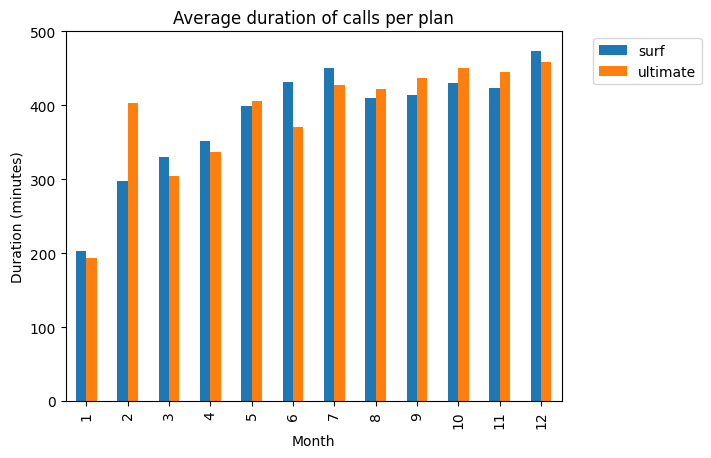

In [46]:
#Plot a bar plot to visualize it.
average_duration.plot(kind ='bar', ylim=[0,500])
plt.title('Average duration of calls per plan')
plt.xlabel('Month')
plt.ylabel('Duration (minutes)')
plt.legend(title='Plan')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


*the above bar plot shows the average duration of calls per plan by month. From the graph, it is clear that 
- the average duration of call for plan surf is greater than for ultimate for months January, March, April, June, July, December.
- For the remaining months average duration is higher for plan ultimate.
- Maximum average value for plan ultimate is approximately 460 minutes. In ultimate, monthly baseplan  3000 minutes  allowed and it is clear that there is no additiona revenue by exceeding the limit of monthly minutes by plan ultimate.*

Our aim is to compare the total duration of each plan requires each month. For this, group the user data by month and plan. Then find the sum of total duration.

In [47]:
# Compare the number of minutes users of each plan require each month.
total_duration_by_plan =user_data.groupby(['month','plan'])['total_duration'].sum().unstack()
display(total_duration_by_plan)

plan,surf,ultimate
month,,
1,406.0,774.0
2,2673.0,2822.0
3,7590.0,3651.0
4,17577.0,7074.0
5,30768.0,11781.0
6,41836.0,17435.0
7,54448.0,25197.0
8,66438.0,29922.0
9,80360.0,37626.0


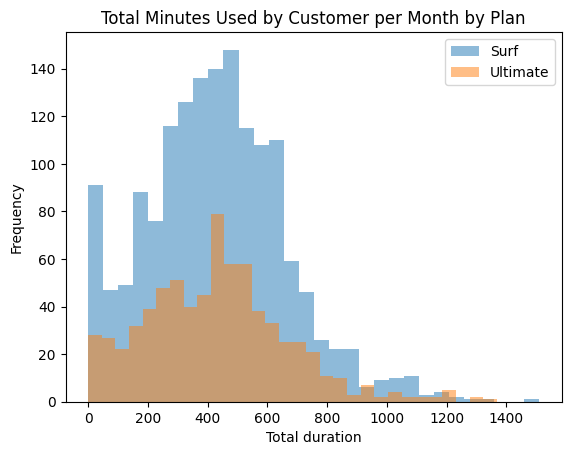

In [48]:
# Plot a histogram based on number of minutes users of each plan require each month.
plan_surf =user_data[user_data['plan']=='surf']
plan_ultimate = user_data[user_data['plan']=='ultimate']
plt.hist(plan_surf['total_duration'], bins=30, alpha=0.5)
plt.hist(plan_ultimate['total_duration'], bins=30, alpha=0.5)
plt.xlabel('Total duration')
plt.ylabel('Frequency')
plt.title('Total Minutes Used by Customer per Month by Plan')
plt.legend(['Surf','Ultimate'])
plt.show()

*The histogram shows the distribution of total minutes used by customer per month for each plan. For surf plan, it is widely distributed with a higher peak compared to plan ultimate. the peak is almost around centre indicates moderate range of minute usage for surf plan users. From the figure, for ultimate plan shows narrower distribution and it is clear that some consistent users for this plan. This analysis shows the usage pattern for two plans.*

Our aim is to calculate the mean, variance and standard deviation of each plan.

In [49]:
# Calculate the mean and the variance of the monthly call duration
mean_var=user_data.groupby('plan')['total_duration'].agg(['mean','var','std'])
print(mean_var)

                mean           var         std
plan                                          
surf      428.749523  54968.279461  234.453150
ultimate  430.450000  57844.464812  240.508762


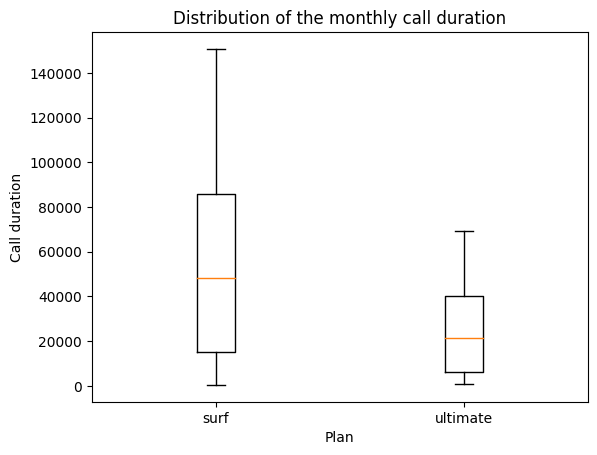

In [50]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.boxplot(total_duration_by_plan)
plt.xlabel('Plan')
plt.ylabel('Call duration')
plt.title('Distribution of the monthly call duration')
plt.xticks([1,2],['surf','ultimate'])
plt.show()

*The boxplot shows the distribution of monthly call duration.  From the plot, it is clear that distribution of surf plan is more wider than ultimate plan. The median for surf plan is almost doubled than the plan ultimate. The interquartile range of surf is more than that of ultimate. Tha maximum value for surf is almost double than that of plan ultimate.*  

From the above analysis of calls behaviour, it is clear that the surf users have wide distribution than ultimate users. Ultimate users follows a consistent pattern means most of this plan users are within the allowance limit.

### Messages

Our aim is to compare the number of messages per each plan per each distinct month. For this, group the user data by month and plan. Then find the sum of number of messages.

In [51]:
# Compare the number of messages users of each plan tend to send each month
total_messages=user_data.groupby(['month','plan'])['number_of_messages'].sum().unstack()
print(messages)

             id  user_id message_date  month
0      1000_125     1000   2018-12-27     12
1      1000_160     1000   2018-12-31     12
2      1000_223     1000   2018-12-31     12
3      1000_251     1000   2018-12-27     12
4      1000_255     1000   2018-12-26     12
...         ...      ...          ...    ...
76046  1497_526     1497   2018-12-24     12
76047  1497_536     1497   2018-12-24     12
76048  1497_547     1497   2018-12-31     12
76049  1497_558     1497   2018-12-24     12
76050  1497_613     1497   2018-12-23     12

[76051 rows x 4 columns]


In [52]:
# Calculate the mean and the variance of the monthly messages send by each plan
message_mean_var=user_data.groupby(['month','plan'])['number_of_messages'].agg(['mean','var']).unstack()
print(message_mean_var)

            mean                     var             
plan        surf   ultimate         surf     ultimate
month                                                
1      10.500000  15.500000   220.500000   313.666667
2      12.000000  21.571429   386.000000   478.285714
3      15.260870  20.250000   346.565217   654.386364
4      17.400000  22.047619   501.591837   544.147619
5      24.012987  32.103448   847.197198  1297.310345
6      25.298969  29.340426   914.920103   857.620722
7      27.033058  32.830508   923.915565   960.488019
8      28.777778  38.478873  1029.515528  1196.367404
9      30.762887  37.895349  1003.829496  1050.918331
10     33.839662  39.443396  1275.465708  1221.106289
11     32.385159  38.606299  1065.344034  1232.669166
12     38.600629  45.006623  1458.158612  1549.419956


In [53]:
# Calculate the mean, variance,standard deviation  of the  messages send by each plan
total_message_mean_var =user_data.groupby('plan')['number_of_messages'].agg(['mean','var','std'])
print(total_message_mean_var)

               mean          var        std
plan                                       
surf      31.159568  1126.724522  33.566717
ultimate  37.551389  1208.756744  34.767179


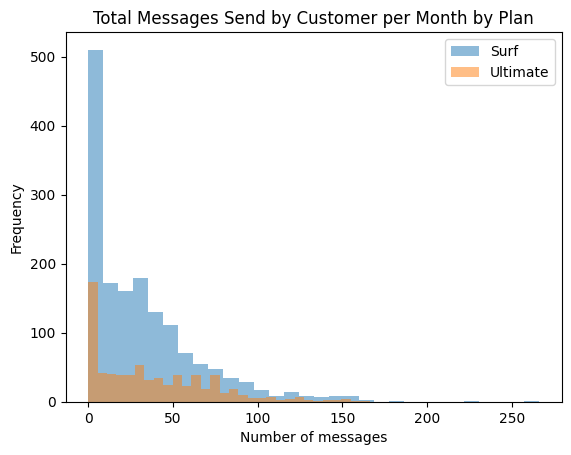

In [54]:
plt.hist(plan_surf['number_of_messages'], bins=30, alpha=0.5)
plt.hist(plan_ultimate['number_of_messages'], bins=30, alpha=0.5)
plt.xlabel('Number of messages')
plt.ylabel('Frequency')
plt.title('Total Messages Send by Customer per Month by Plan')
plt.legend(['Surf','Ultimate'])
plt.show()

*The histogram shows the total messages send by customer per month for each plan. For surf plan, it is widely distributed with a higher peak compared to plan ultimate.  From the figure, for ultimate plan shows narrower distribution and it is clear that some consistent users for this plan.*

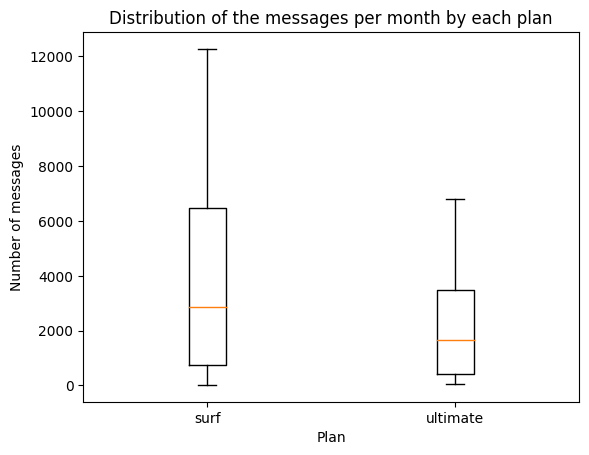

In [55]:
# Plot a boxplot to visualize the distribution of the number of messages by each plan
plt.boxplot(total_messages)
plt.xlabel('Plan')
plt.ylabel('Number of messages')
plt.title('Distribution of the messages per month by each plan')
plt.xticks([1,2],['surf','ultimate'])
plt.show()

*The boxplot shows the distribution of messages per month by each plan..  From the plot, it is clear that distribution of surf plan is more wider than ultimate plan. The median for surf plan is higher than the plan ultimate. The interquartile range of surf is more than that of ultimate. Tha maximum value for surf is almost double than that of plan ultimate.*  

From the above analysis of messaging behaviour, it is clear that the surf users have wide distribution than ultimate users. Ultimate users follows a consistent pattern means most of this plan users are within the allowance limit.

### Internet

Our aim is to compare the amount of internet traffic consumed by users for each plan per each distinct month. For this, group the user data by month and plan. Then find the sum of total gb.

In [56]:
# Compare the amount of internet traffic consumed by users per plan
internet=user_data.groupby(['month','plan'])['total_gb'].sum().unstack()
print(internet)

plan     surf  ultimate
month                  
1        10.0      29.0
2       110.0     121.0
3       312.0     221.0
4       611.0     343.0
5      1087.0     489.0
6      1502.0     725.0
7      2042.0     973.0
8      2735.0    1267.0
9      3238.0    1463.0
10     4126.0    1878.0
11     4650.0    2174.0
12     5800.0    2778.0


In [57]:
# Calculate the mean and the variance of the monthly gb used by each plan
internet_mean_var=user_data.groupby(['month','plan'])['total_gb'].agg(['mean','var']).unstack()
print(internet_mean_var)

            mean                   var            
plan        surf   ultimate       surf    ultimate
month                                             
1       5.000000   7.250000  18.000000   14.916667
2      12.222222  17.285714  41.444444   37.904762
3      13.565217  18.416667  63.984190  138.628788
4      12.220000  16.333333  56.215918   85.833333
5      14.116883  16.862069  58.183527   54.194581
6      15.484536  15.425532  47.752363   68.858464
7      16.876033  16.491525  61.476171   64.254237
8      16.882716  17.845070  71.420942   58.047082
9      16.690722  17.011628  49.240639   47.258687
10     17.409283  17.716981  60.725846   54.604852
11     16.431095  17.118110  54.607824   54.390701
12     18.238994  18.397351  69.210841   58.841060


In [58]:
# Calculate the mean, variance,standard deviation  of the total gb used by each plan
total_internet_mean_var=user_data.groupby('plan')['total_gb'].agg(['mean','var','std'])
print(total_internet_mean_var)

               mean       var       std
plan                                   
surf      16.670693  61.58360  7.847522
ultimate  17.306944  58.83055  7.670108


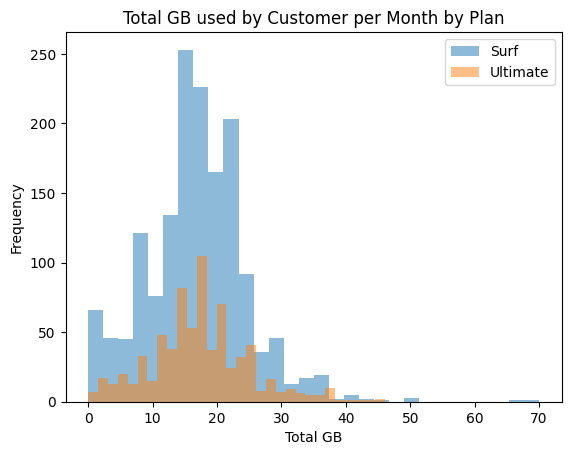

In [59]:
#Plot histogram for total gb used by customer per month by plan
plt.hist(plan_surf['total_gb'], bins=30, alpha=0.5)
plt.hist(plan_ultimate['total_gb'], bins=30, alpha=0.5)
plt.xlabel('Total GB')
plt.ylabel('Frequency')
plt.title('Total GB used by Customer per Month by Plan')
plt.legend(['Surf','Ultimate'])
plt.show()

*The histogram shows the distribution of total gb consumed by customer per month for each plan. For surf plan, it is widely distributed with a higher peak compared to plan ultimate. the peak is almost around centre indicates moderate range of minute usage for surf plan users. From the figure, for ultimate plan shows narrower distribution and it is clear that some consistent users for this plan.*

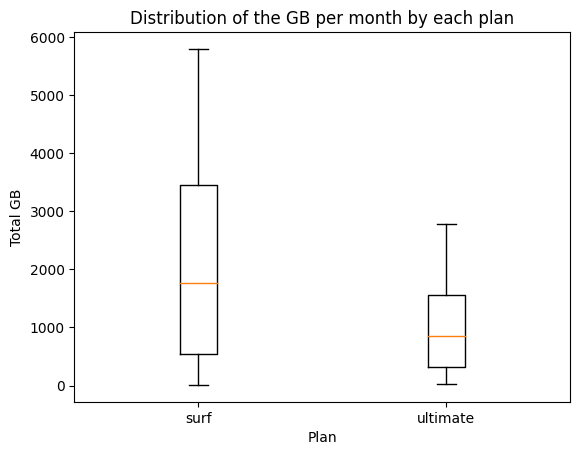

In [60]:
# Plot a boxplot to visualize the distribution of the total gb used by each plan
plt.boxplot(internet)
plt.xlabel('Plan')
plt.ylabel('Total GB')
plt.title('Distribution of the GB per month by each plan')
plt.xticks([1,2],['surf','ultimate'])
plt.show()

*The boxplot shows the distribution of GB per month by each plan.  From the plot, it is clear that distribution of surf plan is more wider than ultimate plan. The median for surf plan is almost doubled than the plan ultimate. The interquartile range of surf is more than that of ultimate. Tha maximum value for surf is almost double than that of plan ultimate.*  

## Revenue

Our aim is to compare the revenue generated by users for each plan per each distinct month. For this, group the user data by month and plan. Then find the sum of revenue.

In [61]:
# Compare the revenue produced by users per plan
revenue1=user_data.groupby(['month','plan'])['revenue'].sum().unstack()
print(revenue1)

plan       surf  ultimate
month                    
1         40.00     280.0
2        309.57     490.0
3       1056.65     896.0
4       2035.53    1533.0
5       3667.37    2051.0
6       4779.80    3367.0
7       7583.56    4242.0
8      10356.85    5173.0
9      11304.67    6195.0
10     15504.83    7665.0
11     16415.21    9107.0
12     22437.14   11067.0


In [62]:
# Calculate the mean and the variance of the monthly revenue generatedd by each plan
revenue_mean_var=user_data.groupby(['month','plan'])['revenue'].agg(['mean','var']).unstack()
print(revenue_mean_var)

            mean                     var            
plan        surf   ultimate         surf    ultimate
month                                               
1      20.000000  70.000000     0.000000    0.000000
2      34.396667  70.000000   428.276100    0.000000
3      45.941304  74.666667  1512.023512  145.515152
4      40.710600  73.000000  1198.958402  120.400000
5      47.628182  70.724138  1967.540055   15.206897
6      49.276289  71.638298  1988.914046   75.018501
7      62.674050  71.898305  2943.388409  104.472238
8      63.931173  72.859155  3587.494901  154.808451
9      58.271495  72.034884  2260.644980   75.939945
10     65.421224  72.311321  3198.242612  169.606918
11     58.004276  71.708661  2494.182230   94.668416
12     70.557044  73.291391  4604.410868  212.861192


*Zero variance in month 1 and 2 means all are identical values. That is, all users use the monthly plans and no extra revenue generated.*

In [63]:
# Calculate the mean, variance,standard deviation  of the total revenue generated by each plan
total_revenue_mean_var=user_data.groupby('plan')['revenue'].agg(['mean','var','std'])
print(total_revenue_mean_var)

               mean          var        std
plan                                       
surf      60.706408  3067.835152  55.388042
ultimate  72.313889   129.848486  11.395108


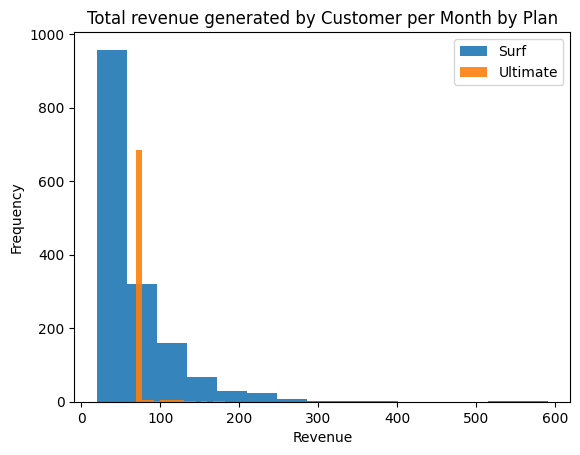

In [64]:
#Plot histogram for totalrevenue generated by customer per month by plan
plt.hist(plan_surf['revenue'], bins=15, alpha=0.9)
plt.hist(plan_ultimate['revenue'], bins=15, alpha=0.9)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Total revenue generated by Customer per Month by Plan')
plt.legend(['Surf','Ultimate'])
plt.show()

*The histogram shows the total revenu generated by customer per month by plan. From the histogram, it is clear that ultimate users are consistent in nature which means almost all users use the monthly base plan. From the graph, surf plan users pay additional amount when exceeds the limit and more users are in surf plan.*

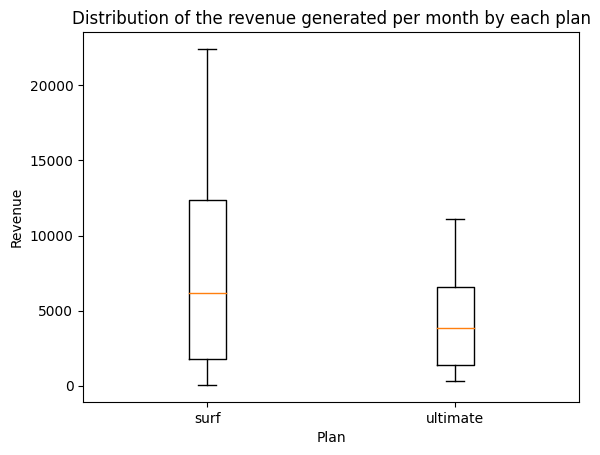

In [65]:
# Plot a boxplot to visualize the distribution of the total revenue generated by each plan
plt.boxplot(revenue1)
plt.xlabel('Plan')
plt.ylabel('Revenue')
plt.title('Distribution of the revenue generated per month by each plan')
plt.xticks([1,2],['surf','ultimate'])
plt.show()

*The boxplot shows the distribution of revenue generated per month by each plan.  From the plot, it is clear that distribution of surf plan is more wider than ultimate plan.  The interquartile range of surf is more than that of ultimate. Tha maximum value for surf is almost double than that of plan ultimate.*  

## Test statistical hypotheses

##Stage 4:

In this stage test statistical hypotheses.
- Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

Formulate null and alternative hypotheses.
- H0 : Average revenue from users of the Ultimate and Surf calling plans are same
- H1 : Average revenue from users of the Ultimate and Surf calling plans are different

Assume alpha = 0.05

In [66]:
# Test the hypotheses
sample1=plan_surf['revenue']
sample2=plan_ultimate['revenue']
alpha =0.05
results=st.ttest_ind(sample1, sample2)
print('p-value:',results.pvalue)
if results.pvalue<alpha:
    print('We reject the null hypothesis')
else:
     print("We can't reject the null hypothesis")

p-value: 2.862674510698644e-08
We reject the null hypothesis


*The p value is very small, so we reject the null hypothesis.The average revenue from users of the Ultimate and Surf calling plans are different.*

-Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

Formulate null and alternative hypotheses.
- H0 : Average revenue from users in the NY-NJ area is same from that of the users from the other regions.
- H1 : Average revenue from users in the NY-NJ area is different from that of the users from the other regions.

Assume alpha = 0.05

In [67]:
#Merge user_data with city
user_data_with_city=user_data.merge(users[['user_id', 'city']], on='user_id')
#Filter NY_NJ regions with other regions
revenue_ny_nj=user_data_with_city[user_data_with_city['city'].str.contains('NY-NJ')]['revenue']
revenue_others =user_data_with_city[~user_data_with_city['city'].str.contains('NY-NJ')]['revenue']

In [68]:
# Test the hypotheses
alpha =0.05
results=st.ttest_ind(revenue_ny_nj, revenue_others)
print('p-value:',results.pvalue)
if results.pvalue<alpha:
    print('We reject the null hypothesis')
else:
     print("We can't reject the null hypothesis")

p-value: 0.043557431621342436
We reject the null hypothesis


*The p value is small, so we reject the null hypothesis.The average revenue from users in the NY-NJ area is different from that of the users from the other regions..*

## General conclusion

In this project, we analyze the data to find the better plan which brings more revenue of telecom operator Megaline. From the analysis it is clear that most of the users in Ultimate plan are consistent which means there call, messaging, internet needs are within the allowable limits. But in the case of surf plan, users exceed the limits and pays extra. Among 500 customers 68 percent uses surf plan and compared to ultimate  the users shows wide behavior for surf plan. So the surf plan brings more revenue than ultimate plan. So commercial department should allocate more advertising budget for surf plan than ultimate.